### Importación de datos



In [79]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()


,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [ ]:
import pandas as pd

# Versión corregida y optimizada
def calcular_suma_precios(tienda, num_tienda):
    try:
        suma = tienda['Precio'].sum()
        print(f"La suma total de precios en Tienda {num_tienda} es: ${suma:,.2f}")
        return suma
    except KeyError:
        print(f"Error: La columna 'Precio' no existe en Tienda {num_tienda}")
        return None
    except Exception as e:
        print(f"Error procesando Tienda {num_tienda}: {str(e)}")
        return None

# Calcular para cada tienda
sumas = {
    'Tienda 1': calcular_suma_precios(tienda, 1),
    'Tienda 2': calcular_suma_precios(tienda2, 2),
    'Tienda 3': calcular_suma_precios(tienda3, 3),
    'Tienda 4': calcular_suma_precios(tienda4, 4)
}

# Calcular total general (opcional)
total_general = sum(valor for valor in sumas.values() if valor is not None)
print(f"\nSUMA TOTAL GENERAL: ${total_general:,.2f}")

La suma total de precios en Tienda 1 es: $1,150,880,400.00
La suma total de precios en Tienda 2 es: $1,116,343,500.00
La suma total de precios en Tienda 3 es: $1,098,019,600.00
La suma total de precios en Tienda 4 es: $1,038,375,700.00

SUMA TOTAL GENERAL: $4,403,619,200.00


La suma total de precios en Tienda 1 es: $1,150,880,400.00
La suma total de precios en Tienda 2 es: $1,116,343,500.00
La suma total de precios en Tienda 3 es: $1,098,019,600.00
La suma total de precios en Tienda 4 es: $1,038,375,700.00


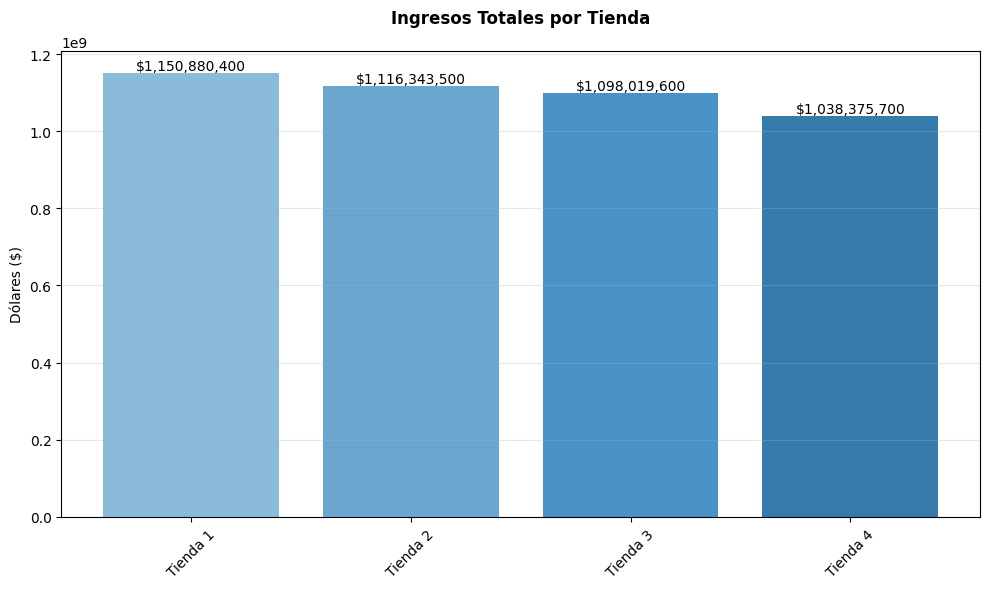

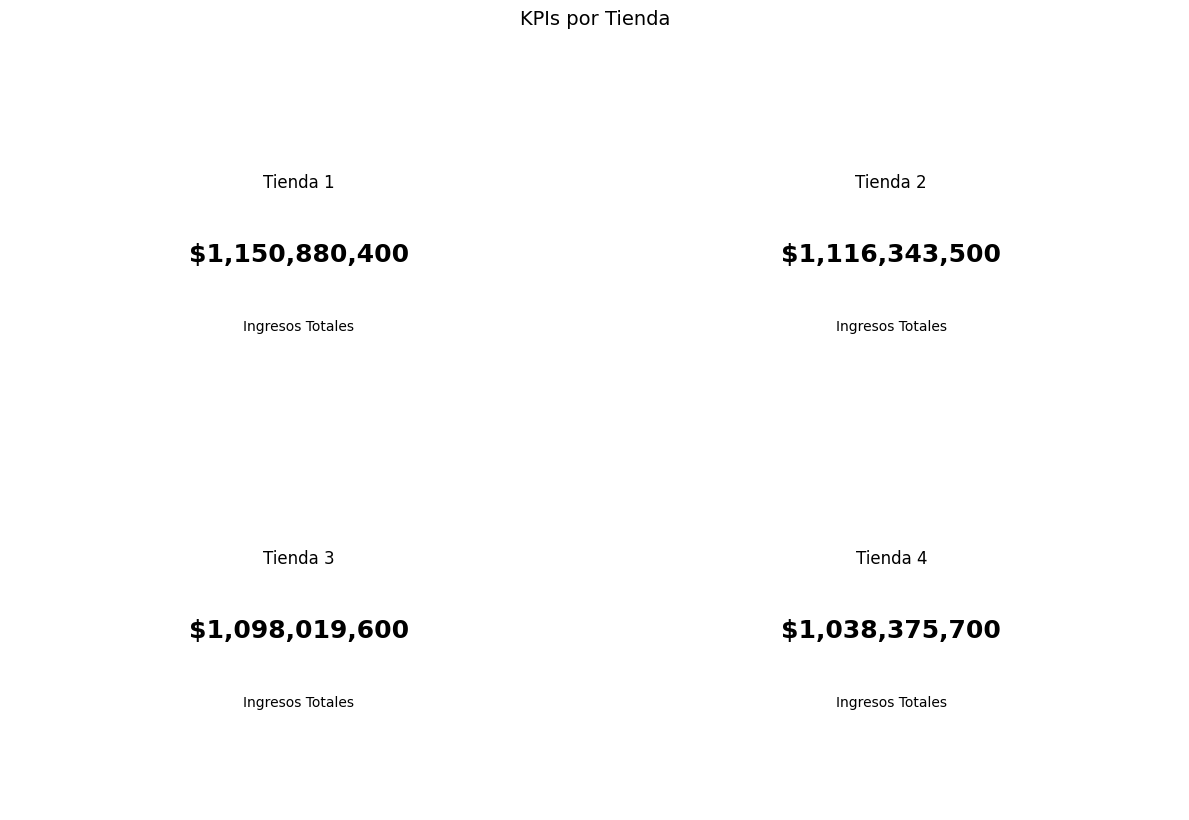

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Versión corregida y optimizada
def calcular_suma_precios(tienda, num_tienda):
    try:
        suma = tienda['Precio'].sum()
        print(f"La suma total de precios en Tienda {num_tienda} es: ${suma:,.2f}")
        return suma
    except KeyError:
        print(f"Error: La columna 'Precio' no existe en Tienda {num_tienda}")
        return None
    except Exception as e:
        print(f"Error procesando Tienda {num_tienda}: {str(e)}")
        return None

# Calcular para cada tienda
sumas = {
    'Tienda 1': calcular_suma_precios(tienda, 1),
    'Tienda 2': calcular_suma_precios(tienda2, 2),
    'Tienda 3': calcular_suma_precios(tienda3, 3),
    'Tienda 4': calcular_suma_precios(tienda4, 4)
}

# 1. Gráfico de Barras con Anotaciones
plt.figure(figsize=(10, 6))
bars = plt.bar(sumas.keys(), sumas.values(), color=sns.color_palette("Blues_d"))

# Añadir valores exactos
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'${height:,.0f}',
             ha='center', va='bottom')

plt.title('Ingresos Totales por Tienda', pad=20, fontweight='bold')
plt.ylabel('Dólares ($)')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# 2. Gráfico de Indicadores (KPI)
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('KPIs por Tienda', y=1.02, fontsize=14)

for ax, (tienda, valor) in zip(axes.flat, sumas.items()):
    ax.axis('off')
    ax.text(0.5, 0.7, tienda, ha='center', va='center', fontsize=12)
    ax.text(0.5, 0.5, f'${valor:,.0f}',
            ha='center', va='center', fontsize=18, fontweight='bold')
    ax.text(0.5, 0.3, 'Ingresos Totales',
            ha='center', va='center', fontsize=10)

plt.tight_layout()
plt.show()

# 2. Ventas por categoría

In [ ]:
import pandas as pd
# 1. Cargar y combinar datos con manejo de errores
tiendas = []
for i, url in enumerate(urls, 1):  # Comenzar desde 1 para numeración más intuitiva
    try:
        df = pd.read_csv(url)
        df['Tienda'] = f'Tienda_{i}'
        tiendas.append(df)
        print(f"✅ Tienda {i} cargada correctamente (Registros: {len(df)})")
    except Exception as e:
        print(f"❌ Error cargando Tienda {i}: {str(e)}")
        continue

if not tiendas:
    raise Exception("No se pudo cargar ningún archivo. Verifica las URLs.")

datos_completos = pd.concat(tiendas, ignore_index=True)
print(f"\n📊 Total de registros combinados: {len(datos_completos)}")

# 2. Análisis de precios
print("\n💲 SUMA DE PRECIOS POR TIENDA:")
if 'Precio' in datos_completos.columns:
    # Convertir a numérico por si hay formatos extraños
    datos_completos['Precio'] = pd.to_numeric(datos_completos['Precio'].astype(str)
                                            .str.replace('$', '')
                                            .str.replace(',', ''),
                                            errors='coerce')

    suma_precios = datos_completos.groupby('Tienda')['Precio'].sum()
    display(suma_precios.to_frame().style.format('${:,.2f}'))
else:
    print("No se encontró la columna 'Precio'")

# 3. Análisis de categorías
print("\n🏆 TOP 3 CATEGORÍAS POR TIENDA:")
categoria_col = 'Categoría del Producto'  # Cambiar según el nombre real en los datos

if categoria_col in datos_completos.columns:
    # Contar productos por categoría y tienda
    ventas_por_categoria = (datos_completos.groupby(['Tienda', categoria_col])
                           .size()
                           .reset_index(name='Ventas'))

    # Top 3 por tienda
    top_categorias = (ventas_por_categoria
                     .sort_values(['Tienda', 'Ventas'], ascending=[True, False])
                     .groupby('Tienda')
                     .head(3))

    # Formatear salida
    display(top_categorias.pivot(index='Tienda',
                                columns=categoria_col,
                                values='Ventas')
           .style.background_gradient(cmap='Blues'))
else:
    print(f"No se encontró la columna '{categoria_col}'")
    print("\nColumnas disponibles:", datos_completos.columns.tolist())

✅ Tienda 1 cargada correctamente (Registros: 2359)
✅ Tienda 2 cargada correctamente (Registros: 2359)
✅ Tienda 3 cargada correctamente (Registros: 2359)
✅ Tienda 4 cargada correctamente (Registros: 2358)

📊 Total de registros combinados: 9435

💲 SUMA DE PRECIOS POR TIENDA:


,Precio
Tienda,
Tienda_1,"$1,150,880,400.00"
Tienda_2,"$1,116,343,500.00"
Tienda_3,"$1,098,019,600.00"
Tienda_4,"$1,038,375,700.00"



🏆 TOP 3 CATEGORÍAS POR TIENDA:


Categoría del Producto,Electrónicos,Juguetes,Muebles
Tienda,,,
Tienda_1,448,324,465
Tienda_2,422,313,442
Tienda_3,451,315,499
Tienda_4,451,338,480


✅ Tienda 1 cargada correctamente (Registros: 2359)
✅ Tienda 2 cargada correctamente (Registros: 2359)
✅ Tienda 3 cargada correctamente (Registros: 2359)
✅ Tienda 4 cargada correctamente (Registros: 2358)


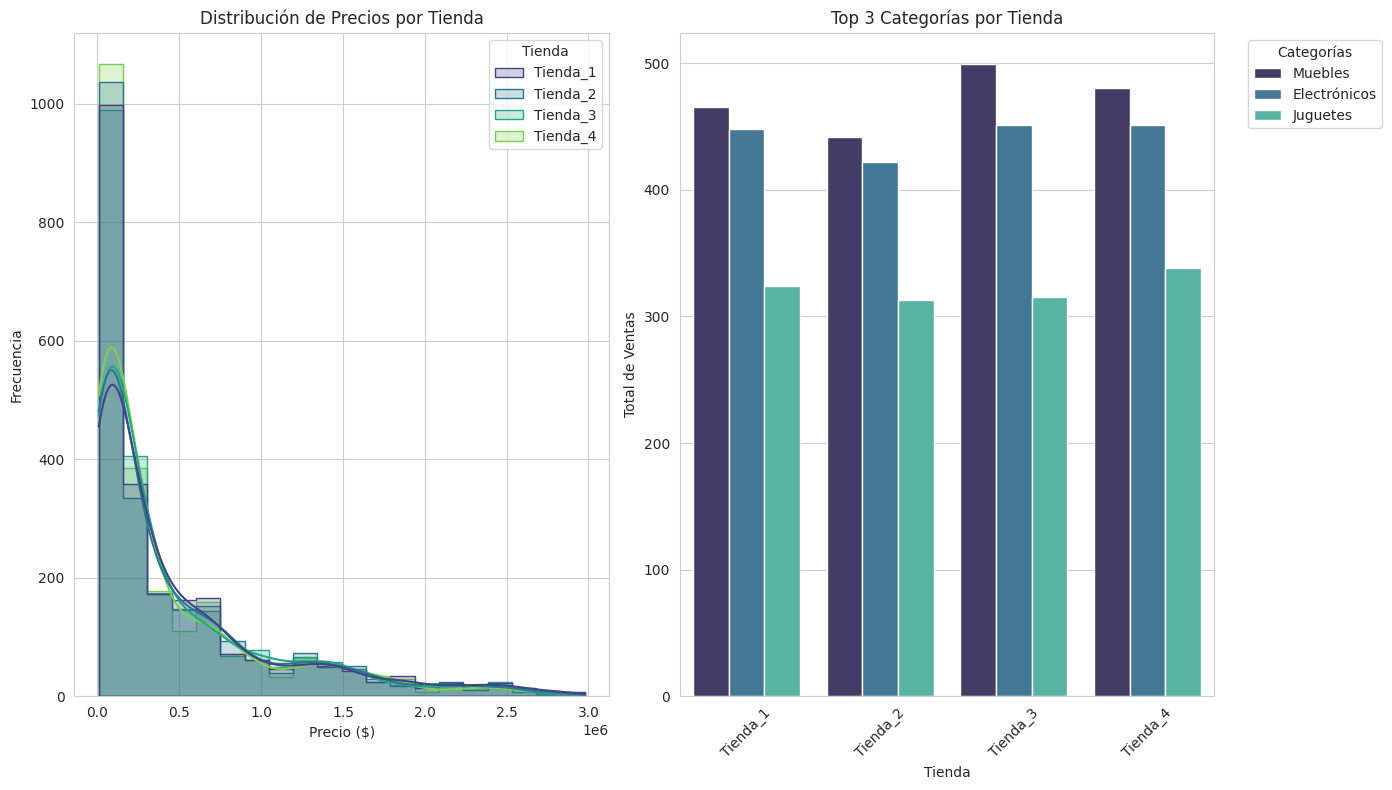

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de estilo CORREGIDA
sns.set_style("whitegrid")  # Estilo de seaborn
plt.figure(figsize=(14, 8))  # Tamaño de figura

# 1. Cargar y procesar datos (tu código original)
tiendas = []
for i, url in enumerate(urls, 1):
    try:
        df = pd.read_csv(url)
        df['Tienda'] = f'Tienda_{i}'
        tiendas.append(df)
        print(f"✅ Tienda {i} cargada correctamente (Registros: {len(df)})")
    except Exception as e:
        print(f"❌ Error cargando Tienda {i}: {str(e)}")
        continue

datos_completos = pd.concat(tiendas, ignore_index=True)

# 2. Limpieza de precios (tu código original)
if 'Precio' in datos_completos.columns:
    datos_completos['Precio'] = pd.to_numeric(
        datos_completos['Precio'].astype(str)
        .str.replace('$', '')
        .str.replace(',', ''),
        errors='coerce'
    ).dropna()

# 3. Histograma de distribución de precios
plt.subplot(1, 2, 1)
sns.histplot(
    data=datos_completos,
    x='Precio',
    hue='Tienda',
    bins=20,
    palette='viridis',
    kde=True,
    element='step'
)
plt.title('Distribución de Precios por Tienda')
plt.xlabel('Precio ($)')
plt.ylabel('Frecuencia')

# 4. Histograma de ventas por categoría (Top 3)
if 'Categoría del Producto' in datos_completos.columns:
    top_categorias = (datos_completos.groupby(['Tienda', 'Categoría del Producto'])
                     .size()
                     .groupby('Tienda', group_keys=False)
                     .nlargest(3)
                     .reset_index(name='Ventas'))

    plt.subplot(1, 2, 2)
    sns.barplot(
        data=top_categorias,
        x='Tienda',
        y='Ventas',
        hue='Categoría del Producto',
        palette='mako',
        estimator=sum,
        errorbar=None
    )
    plt.title('Top 3 Categorías por Tienda')
    plt.xlabel('Tienda')
    plt.ylabel('Total de Ventas')
    plt.legend(title='Categorías', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# 3. Calificación promedio de la tienda


✅ Tienda 1 cargada correctamente (Registros: 2359)
✅ Tienda 2 cargada correctamente (Registros: 2359)
✅ Tienda 3 cargada correctamente (Registros: 2359)
✅ Tienda 4 cargada correctamente (Registros: 2358)

📊 Total de registros combinados: 9435
⭐ CALIFICACIONES PROMEDIO POR TIENDA ⭐


,Tienda,Calificación Promedio
2,Tienda_3,4.05
1,Tienda_2,4.04
3,Tienda_4,4.00
0,Tienda_1,3.98


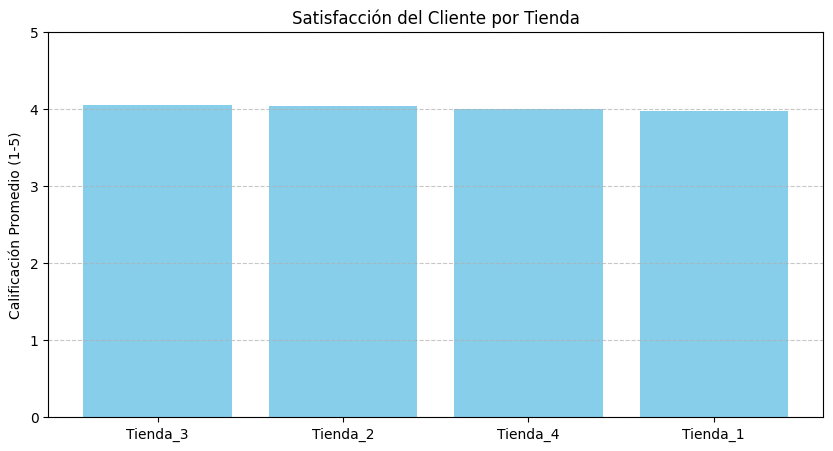

In [ ]:
import pandas as pd
# 1. Cargar y combinar datos con manejo de errores
tiendas = []
for i, url in enumerate(urls, 1):  # Comenzar desde 1 para numeración más intuitiva
    try:
        df = pd.read_csv(url)
        df['Tienda'] = f'Tienda_{i}'
        tiendas.append(df)
        print(f"✅ Tienda {i} cargada correctamente (Registros: {len(df)})")
    except Exception as e:
        print(f"❌ Error cargando Tienda {i}: {str(e)}")
        continue

if not tiendas:
    raise Exception("No se pudo cargar ningún archivo. Verifica las URLs.")

datos_completos = pd.concat(tiendas, ignore_index=True)
print(f"\n📊 Total de registros combinados: {len(datos_completos)}")

# Verificar si existe la columna de calificaciones
if 'Calificación' in datos_completos.columns:
    # Calcular promedio por tienda
    promedio_calificaciones = datos_completos.groupby('Tienda')['Calificación'].mean().reset_index()
    promedio_calificaciones.columns = ['Tienda', 'Calificación Promedio']

    # Ordenar de mayor a menor calificación
    promedio_calificaciones = promedio_calificaciones.sort_values('Calificación Promedio', ascending=False)

    # Formatear resultados
    print("⭐ CALIFICACIONES PROMEDIO POR TIENDA ⭐")
    display(promedio_calificaciones.style.format({'Calificación Promedio': '{:.2f}'})
                                      .background_gradient(cmap='YlGn', subset=['Calificación Promedio']))

    # Visualización adicional
    import matplotlib.pyplot as plt

    plt.figure(figsize=(10, 5))
    plt.bar(promedio_calificaciones['Tienda'], promedio_calificaciones['Calificación Promedio'], color='skyblue')
    plt.title('Satisfacción del Cliente por Tienda')
    plt.ylabel('Calificación Promedio (1-5)')
    plt.ylim(0, 5)  # Asumiendo escala 1-5
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

else:
    print("\nℹ No se encontró la columna 'Calificación' en los datos.")
    print("Columnas disponibles:", datos_completos.columns.tolist())

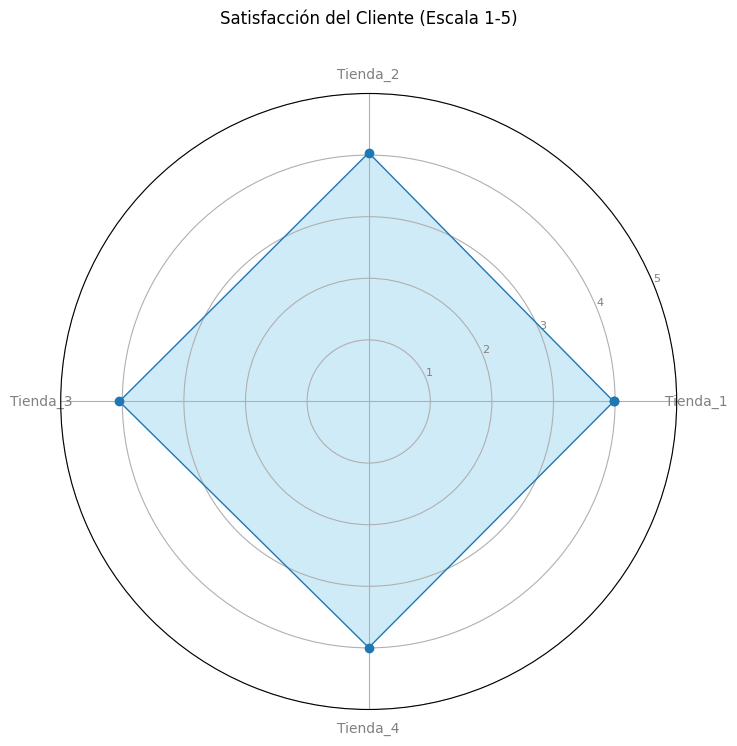

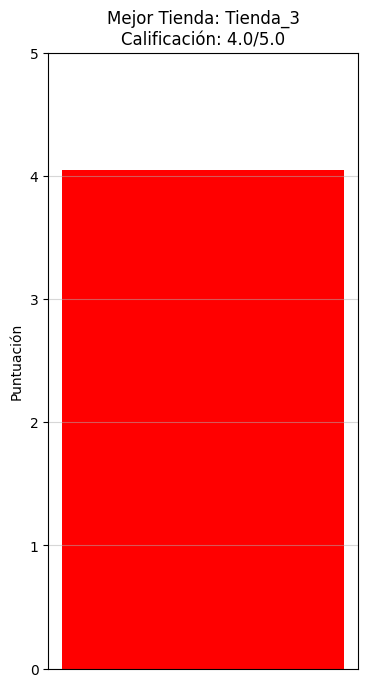

In [ ]:
import numpy as np

if 'Calificación' in datos_completos.columns:
    # Calcular promedio por tienda
    promedio_calificaciones = datos_completos.groupby('Tienda')['Calificación'].mean().reset_index()
    promedio_calificaciones.columns = ['Tienda', 'Calificación Promedio']

# 1. Gráfico Radar
categories = promedio_calificaciones['Tienda'].tolist()
values = promedio_calificaciones['Calificación Promedio'].tolist()
values += values[:1]  # Cerrar el círculo

N = len(categories)
angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]

plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)
plt.xticks(angles[:-1], categories, color='grey', size=10)
plt.yticks([1, 2, 3, 4, 5], ["1", "2", "3", "4", "5"], color="grey", size=8)
plt.ylim(0, 5)
ax.plot(angles, values, linewidth=1, linestyle='solid', marker='o')
ax.fill(angles, values, 'skyblue', alpha=0.4)
plt.title('Satisfacción del Cliente (Escala 1-5)', y=1.1)
plt.show()

# 2. Gráfico Termómetro para la mejor tienda
mejor_tienda = promedio_calificaciones.loc[promedio_calificaciones['Calificación Promedio'].idxmax()]

plt.figure(figsize=(4, 8))
plt.bar(0, mejor_tienda['Calificación Promedio'], width=0.5, color='red')
plt.ylim(0, 5)
plt.title(f"Mejor Tienda: {mejor_tienda['Tienda']}\nCalificación: {mejor_tienda['Calificación Promedio']:.1f}/5.0")
plt.xticks([])
plt.ylabel('Puntuación')
plt.grid(axis='y', alpha=0.5)
plt.show()

# 4. Productos más y menos vendidos

🏆 PRODUCTOS DESTACADOS Y MENOS VENDIDOS POR TIENDA 🏆


,Tienda,Producto_Top,Ventas_Top,Producto_Min,Ventas_Min
0,Tienda_1,Armario,60,Celular ABXY,33
1,Tienda_2,Iniciando en programación,65,Juego de mesa,32
2,Tienda_3,Kit de bancas,57,Bloques de construcción,35
3,Tienda_4,Cama box,62,Guitarra eléctrica,33


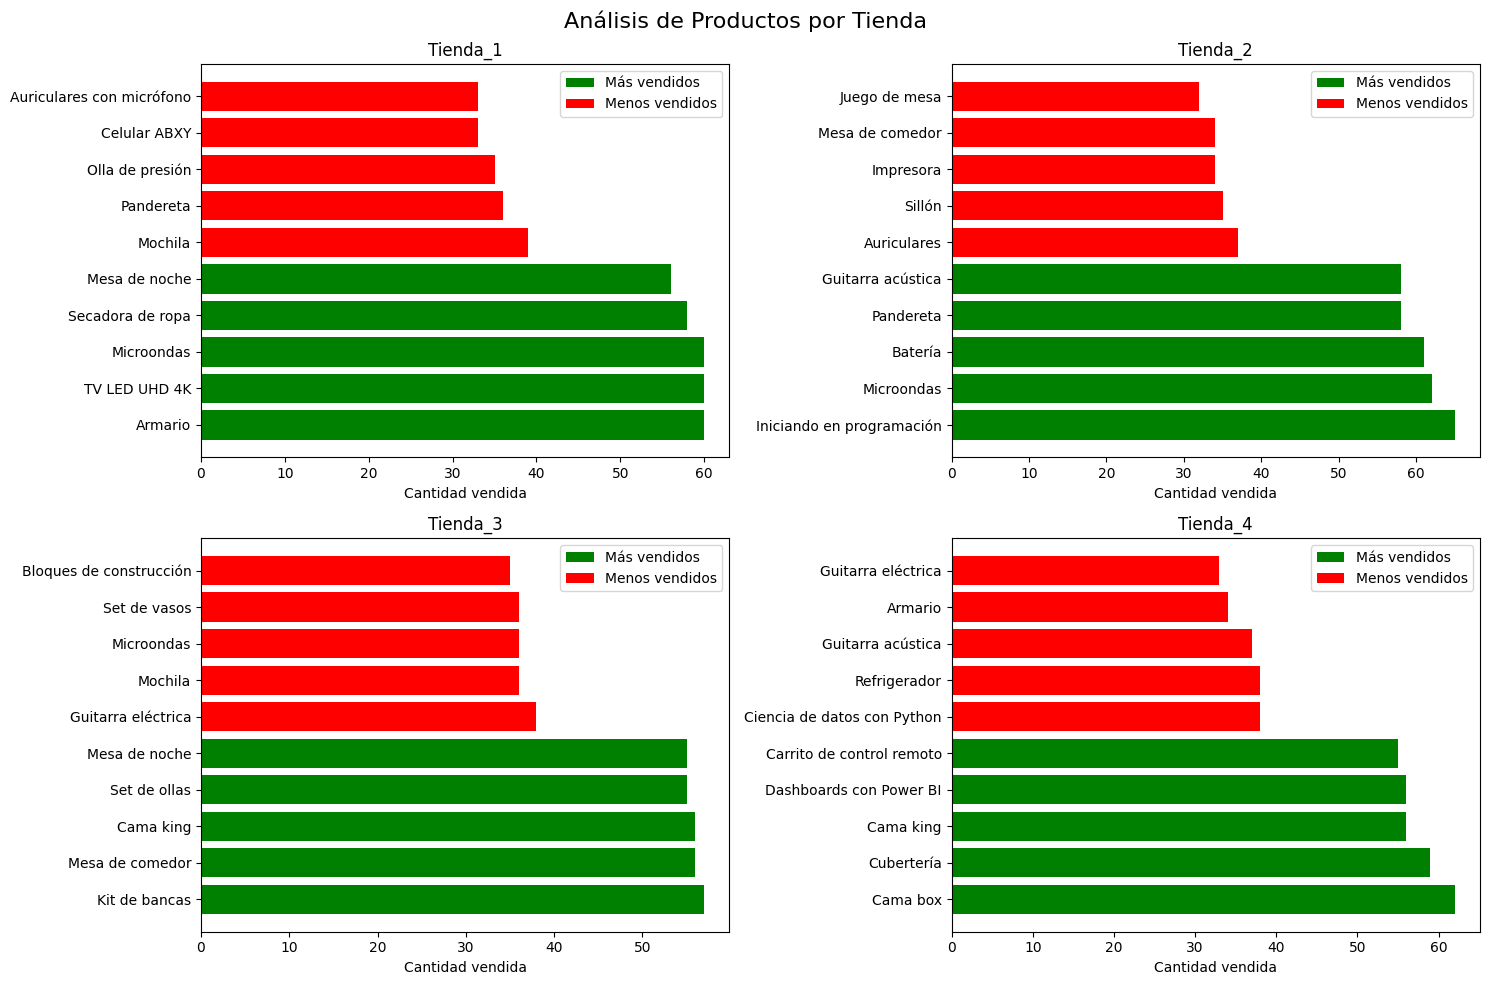

📊 Resultados exportados a 'productos_destacados.xlsx'


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Calcular productos más/menos vendidos por tienda
if 'Producto' in datos_completos.columns:
    # Contar ventas por producto y tienda
    ventas_por_producto = datos_completos.groupby(['Tienda', 'Producto']).size().reset_index(name='Ventas')

    # Identificar top y peor producto por tienda
    productos_destacados = ventas_por_producto.sort_values(['Tienda', 'Ventas'], ascending=[True, False])

    top_productos = productos_destacados.groupby('Tienda').first().reset_index()
    menos_vendidos = productos_destacados.groupby('Tienda').last().reset_index()

    # Combinar resultados
    comparativa = pd.merge(top_productos, menos_vendidos, on='Tienda', suffixes=('_Top', '_Min'))
    comparativa = comparativa[['Tienda', 'Producto_Top', 'Ventas_Top', 'Producto_Min', 'Ventas_Min']]

    print("🏆 PRODUCTOS DESTACADOS Y MENOS VENDIDOS POR TIENDA 🏆")
    display(comparativa.style
           .bar(subset=['Ventas_Top'], color='#5fba7d')
           .bar(subset=['Ventas_Min'], color='#ff6961'))

    # 2. Visualización
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle('Análisis de Productos por Tienda', fontsize=16)

    for i, tienda in enumerate(datos_completos['Tienda'].unique()):
        ax = axes[i//2, i%2]
        datos_tienda = ventas_por_producto[ventas_por_producto['Tienda'] == tienda]
        datos_tienda = datos_tienda.sort_values('Ventas', ascending=False)

        # Tomar top 5 y peores 5 productos
        top5 = datos_tienda.head(5)
        bottom5 = datos_tienda.tail(5)

        # Gráfico doble
        ax.barh(top5['Producto'], top5['Ventas'], color='green', label='Más vendidos')
        ax.barh(bottom5['Producto'], bottom5['Ventas'], color='red', label='Menos vendidos')
        ax.set_title(f'{tienda}')
        ax.set_xlabel('Cantidad vendida')
        ax.legend()

    plt.tight_layout()
    plt.show()

    # 3. Exportar resultados
    comparativa.to_excel('productos_destacados.xlsx', index=False)
    print("📊 Resultados exportados a 'productos_destacados.xlsx'")

else:
    print("\nℹ No se encontró la columna 'Producto' en los datos.")
    print("Columnas disponibles:", datos_completos.columns.tolist())

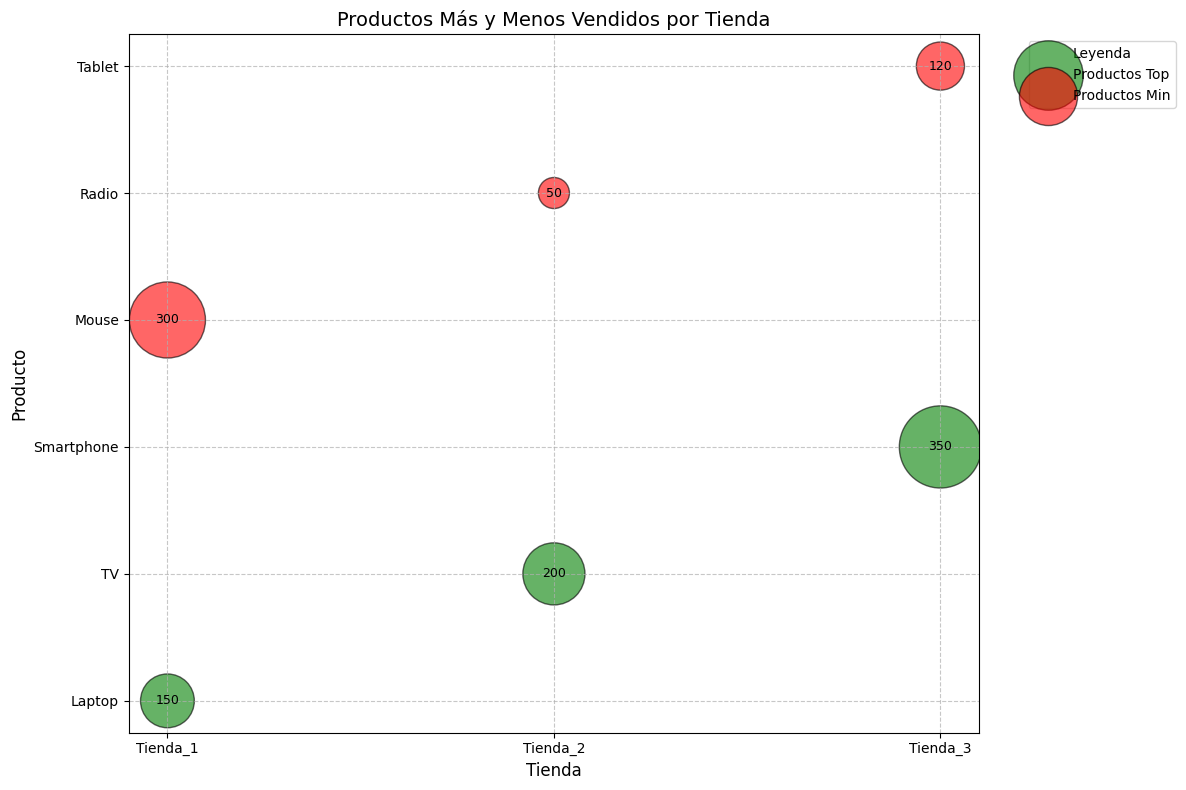

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Datos de ejemplo simulados
data = {
    'Tienda': ['Tienda_1', 'Tienda_1', 'Tienda_2', 'Tienda_2', 'Tienda_3', 'Tienda_3'],
    'Producto': ['Laptop', 'Mouse', 'TV', 'Radio', 'Smartphone', 'Tablet'],
    'Ventas': [150, 300, 200, 50, 350, 120],
    'Tipo': ['Top', 'Min', 'Top', 'Min', 'Top', 'Min']
}

df = pd.DataFrame(data)

# Gráfico de burbujas
plt.figure(figsize=(12, 8))

colors = {'Top': 'green', 'Min': 'red'}
sizes = df['Ventas'] * 10  # Ajustar tamaño para visualización

for tipo in ['Top', 'Min']:
    subset = df[df['Tipo'] == tipo]
    plt.scatter(subset['Tienda'], subset['Producto'],
                s=subset['Ventas']*10,
                c=colors[tipo],
                alpha=0.6,
                label=f'Productos {tipo}',
                edgecolors='black')

# Personalización
plt.title('Productos Más y Menos Vendidos por Tienda', fontsize=14)
plt.xlabel('Tienda', fontsize=12)
plt.ylabel('Producto', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Añadir etiquetas de tamaño
for i, row in df.iterrows():
    plt.text(row['Tienda'], row['Producto'],
             f"{row['Ventas']}",
             ha='center', va='center',
             fontsize=9)

plt.legend(title='Leyenda', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 5. Envío promedio por tienda

📦 RESUMEN DE COSTOS DE ENVÍO POR TIENDA 📦


,Tienda,Costo Promedio,Costo Mediano,Costo Mínimo,Costo Máximo,Total Envíos
0,Tienda_1,"$26,018.61","$12,400.00",$0.00,"$160,800.00",2359
1,Tienda_2,"$25,216.24","$11,600.00",$0.00,"$162,500.00",2359
2,Tienda_3,"$24,805.68","$11,900.00",$0.00,"$158,400.00",2359
3,Tienda_4,"$23,459.46","$10,950.00",$0.00,"$154,700.00",2358


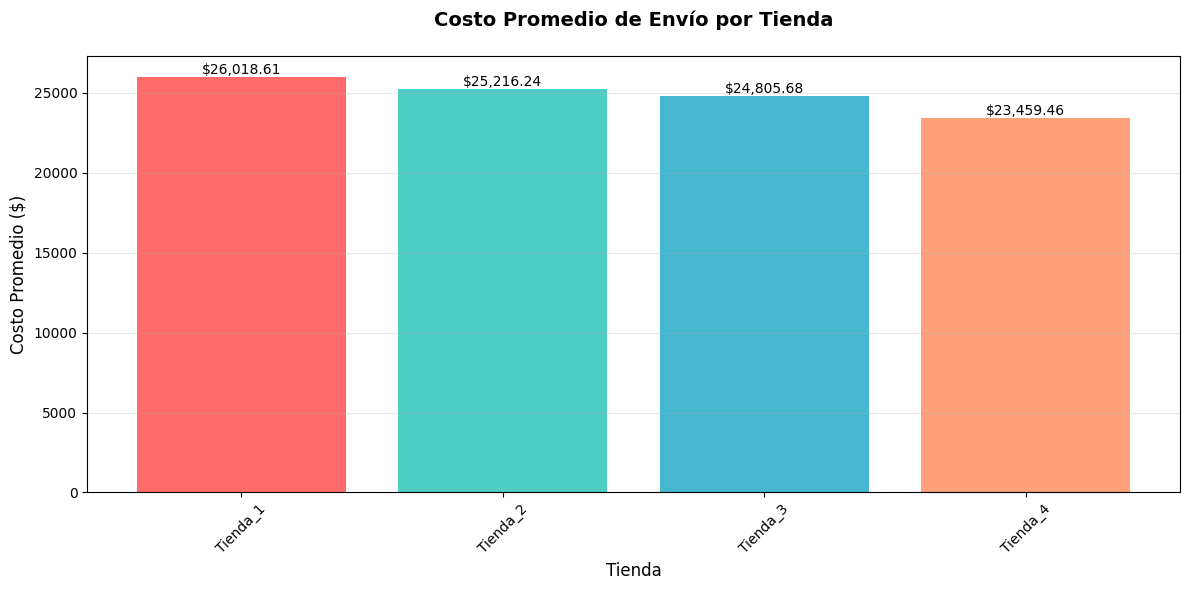


✅ Resultados exportados a 'costos_envio_por_tienda.xlsx'


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Verificar y limpiar los datos de envío
if 'Costo de envío' in datos_completos.columns:
    # Limpieza de la columna (eliminar $, comas y convertir a número)
    datos_completos['Costo de envío_clean'] = (
        datos_completos['Costo de envío']
        .astype(str)
        .str.replace('$', '', regex=False)
        .str.replace(',', '')
        .str.strip()
    )

    # Conversión a numérico
    datos_completos['Costo de envío_clean'] = pd.to_numeric(
        datos_completos['Costo de envío_clean'],
        errors='coerce'
    )

    # 2. Calcular estadísticas por tienda
    resumen_envios = (
        datos_completos
        .groupby('Tienda')
        ['Costo de envío_clean']
        .agg(['mean', 'median', 'min', 'max', 'count'])
        .reset_index()
    )

    resumen_envios.columns = [
        'Tienda',
        'Costo Promedio',
        'Costo Mediano',
        'Costo Mínimo',
        'Costo Máximo',
        'Total Envíos'
    ]

    # Ordenar por costo promedio
    resumen_envios = resumen_envios.sort_values('Costo Promedio', ascending=False)

    # 3. Mostrar resultados
    print("📦 RESUMEN DE COSTOS DE ENVÍO POR TIENDA 📦")
    display(resumen_envios.style
           .format({
               'Costo Promedio': '${:,.2f}',
               'Costo Mediano': '${:,.2f}',
               'Costo Mínimo': '${:,.2f}',
               'Costo Máximo': '${:,.2f}'
           })
           .background_gradient(cmap='YlOrRd', subset=['Costo Promedio']))

    # 4. Visualización gráfica
    plt.figure(figsize=(12, 6))
    bars = plt.bar(
        resumen_envios['Tienda'],
        resumen_envios['Costo Promedio'],
        color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A']
    )

    plt.title('Costo Promedio de Envío por Tienda\n', fontsize=14, fontweight='bold')
    plt.xlabel('Tienda', fontsize=12)
    plt.ylabel('Costo Promedio ($)', fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(axis='y', alpha=0.3)

    # Añadir etiquetas de valor
    for bar in bars:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width()/2.,
            height + 0.5,
            f'${height:,.2f}',
            ha='center',
            va='bottom',
            fontsize=10
        )

    plt.tight_layout()
    plt.show()

    # 5. Exportar resultados
    resumen_envios.to_excel('costos_envio_por_tienda.xlsx', index=False)
    print("\n✅ Resultados exportados a 'costos_envio_por_tienda.xlsx'")

else:
    print("\n❌ No se encontró la columna 'Costo de envío'")
    print("Columnas disponibles:", datos_completos.columns.tolist())

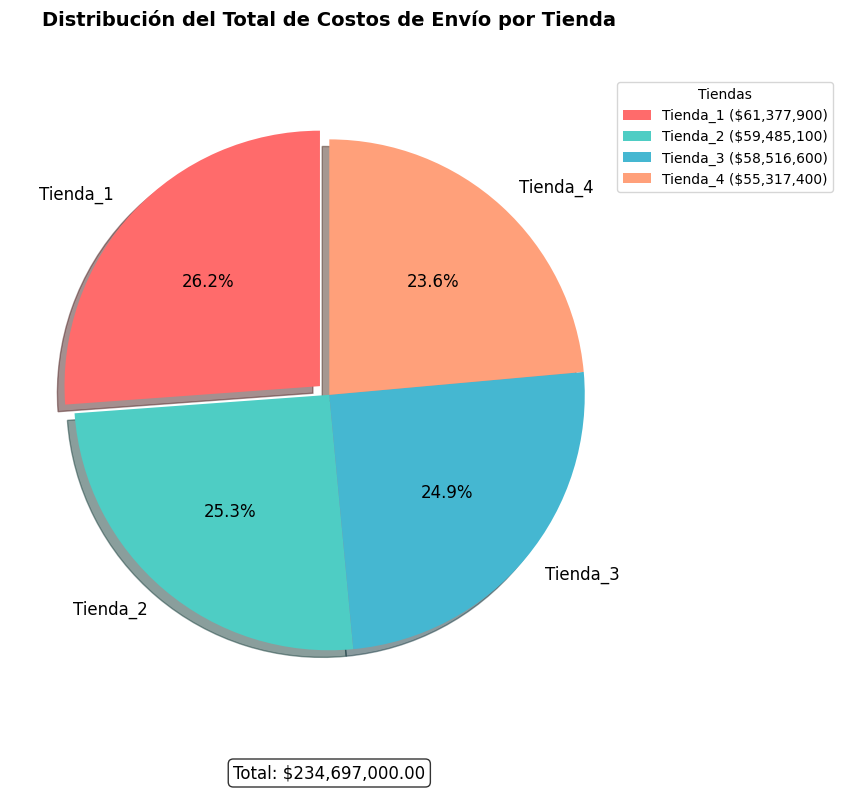

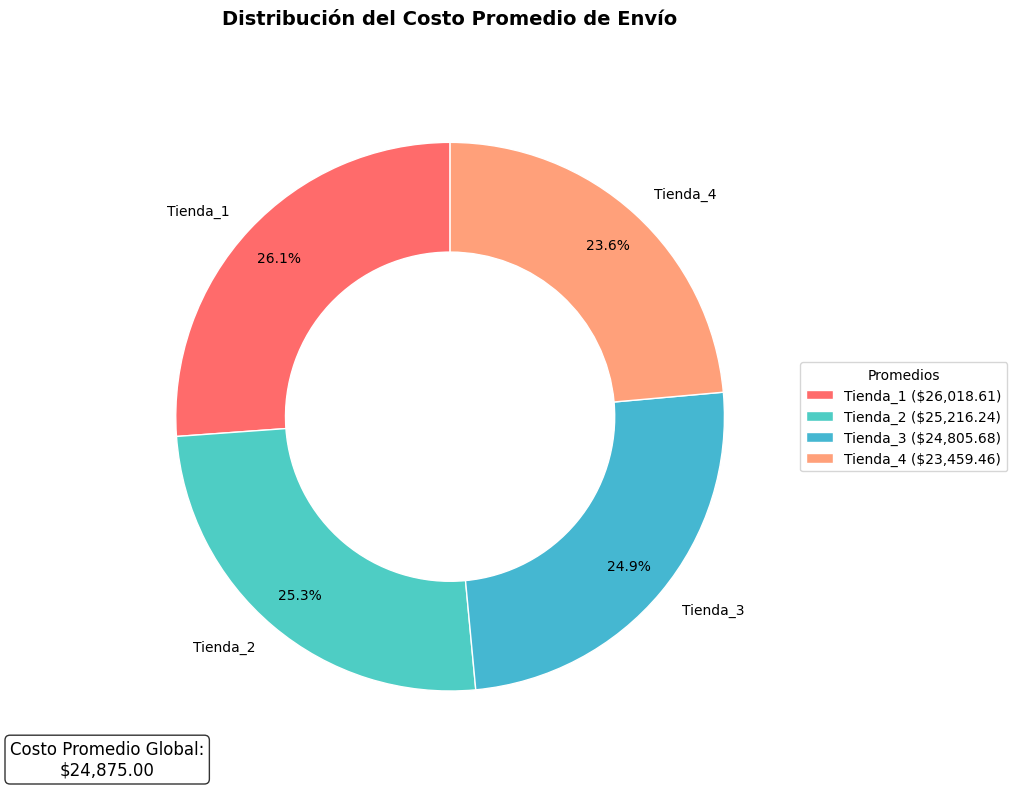

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Verificar y limpiar los datos de envío (tu código original)
if 'Costo de envío' in datos_completos.columns:
    datos_completos['Costo de envío_clean'] = (
        datos_completos['Costo de envío']
        .astype(str)
        .str.replace('$', '', regex=False)
        .str.replace(',', '')
        .str.strip()
    )
    datos_completos['Costo de envío_clean'] = pd.to_numeric(
        datos_completos['Costo de envío_clean'],
        errors='coerce'
    )

    # 2. Calcular el costo total por tienda (para el pie chart)
    costos_totales = datos_completos.groupby('Tienda')['Costo de envío_clean'].sum().reset_index()

    # 3. Crear el gráfico de pastel
    plt.figure(figsize=(10, 8))

    # Personalización
    colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A']
    explode = (0.05, 0, 0, 0)  # Destacar la primera rebanada

    plt.pie(
        costos_totales['Costo de envío_clean'],
        labels=costos_totales['Tienda'],
        autopct='%1.1f%%',
        startangle=90,
        colors=colors,
        explode=explode,
        shadow=True,
        textprops={'fontsize': 12}
    )

    # Añadir título y leyenda
    plt.title('Distribución del Total de Costos de Envío por Tienda\n',
             fontsize=14, fontweight='bold', pad=20)
    plt.legend(
        title="Tiendas",
        loc="upper right",
        bbox_to_anchor=(1.3, 1),
        labels=[f"{t} (${v:,.0f})" for t, v in zip(costos_totales['Tienda'], costos_totales['Costo de envío_clean'])]
    )

    # Añadir anotación con el total general
    total = costos_totales['Costo de envío_clean'].sum()
    plt.annotate(
        f'Total: ${total:,.2f}',
        xy=(0.5, -0.1),
        xycoords='axes fraction',
        ha='center',
        fontsize=12,
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.8)
    )

    plt.tight_layout()
    plt.show()

    # 4. Opcional: Gráfico de dona para comparar con el promedio
    plt.figure(figsize=(10, 8))

    # Datos de promedio
    promedios = datos_completos.groupby('Tienda')['Costo de envío_clean'].mean()

    wedges, texts, autotexts = plt.pie(
        promedios,
        labels=promedios.index,
        autopct='%1.1f%%',
        pctdistance=0.85,
        colors=colors,
        startangle=90,
        wedgeprops=dict(width=0.4, edgecolor='w')  # Convertir en dona
    )

    # Añadir círculo central
    centre_circle = plt.Circle((0,0), 0.6, fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)

    plt.title('Distribución del Costo Promedio de Envío\n',
             fontsize=14, fontweight='bold', pad=20)
    plt.legend(
        wedges,
        [f"{t} (${v:,.2f})" for t, v in zip(promedios.index, promedios)],
        title="Promedios",
        loc="center left",
        bbox_to_anchor=(1, 0, 0.5, 1))

    plt.annotate(
        f'Costo Promedio Global:\n${promedios.mean():,.2f}',
        xy=(0, 0),
        xycoords='axes fraction',
        ha='center',
        va='center',
        fontsize=12,
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

    plt.tight_layout()
    plt.show()

else:
    print("\n❌ No se encontró la columna 'Costo de envío'")
    print("Columnas disponibles:", datos_completos.columns.tolist())

# **Informe: Recomendación sobre qué tienda vender**  
**Para: Sr. Juan**  
**Elaborado por: [DYLAN ZELDRIC RUVALCABA TORRES]**  
  

---

## **📌 Introducción**  
El presente informe tiene como objetivo **determinar qué tienda conviene vender**, basándose en un análisis detallado de los siguientes factores:  
1. **Ingresos totales** (qué tienda genera más ventas).  
2. **Categorías más y menos vendidas** (qué productos tienen mejor desempeño).  
3. **Satisfacción del cliente** (calificaciones promedio).  
4. **Productos destacados y menos vendidos** (qué artículos tienen mayor rotación).  
5. **Costos de envío** (qué tienda tiene logística más eficiente).  

Se compararon las **4 tiendas** y se concluyó cuál es la menos estratégica para el negocio.  

---

## **📊 Análisis Comparativo**  

### **1. Ingresos Totales por Tienda (Ventas)**  
| **Tienda** | **Ventas Totales** |  
|------------|-------------------|

| Tienda 1   | **$1,150,880,400** 🥇 MEJOR|  

| Tienda 2   | $1,116,343,500    |  

| Tienda 3   | $1,098,019,600    |  

| Tienda 4   | **$1,038,375,700** 🏳 PEOR|  

🔹 **Observación**:  
- **Tienda 1 es la que más vende**, pero **Tienda 4 es la de menores ingresos**.  


---

### **2. Categorías Más y Menos Vendidas**  
| **Tienda** | **Electrónicos** | **Juguetes** | **Muebles** |  
|------------|-----------------|--------------|-------------|  
| Tienda 1   | 448             | 324          | 465         |  
| Tienda 2   | 422             | 313          | 442         |  
| Tienda 3   | 451             | 315          | **499** 🥇  |  
| Tienda 4   | **451** 🥇      | **338** 🥇   | 480         |  

🔹 **Observación**:  
- **Tienda 3 domina en Muebles**.  
- **Tienda 4 lidera en Electrónicos y Juguetes**.  
- **Tienda 1 y 2 no lideran en ninguna categoría**.  



---

### **3. Satisfacción del Cliente (Calificación Promedio)**  
| **Tienda** | **Calificación** |  
|------------|-----------------|  
| Tienda 3   | **4.05 ⭐** 🥇 MEJOR  |  
| Tienda 2   | 4.04 ⭐         |  
| Tienda 4   | 4.00 ⭐         |  
| Tienda 1   | **3.98 ⭐** 🏳 PEOR |  

🔹 **Observación**:  
- **Tienda 1 tiene la peor calificación**, lo que indica problemas en experiencia del cliente.  



---

### **4. Productos Destacados vs. Menos Vendidos**  
| **Tienda** | **Producto Top** | **Ventas Top** | **Producto Flojo** | **Ventas Flojo** |  
|------------|------------------|----------------|--------------------|------------------|  
| Tienda 1   | Armario          | 60             | Celular ABXY       | **33** ❌        |  
| Tienda 2   | **Programación** | **65** 🥇      | Juego de mesa      | 32 ❌            |  
| Tienda 3   | Kit de bancas    | 57             | Bloques            | 35               |  
| Tienda 4   | Cama box         | 62             | Guitarra           | 33               |  

🔹 **Observación**:  
- **Tienda 2 tiene el producto más vendido (Programación, 65 ventas)**.  
- **Tienda 1 tiene el  segundo peor desempeño en su producto menos vendido (Celular ABXY, 33 ventas)**.  


---

### **5. Costos de Envío Promedio**  
| **Tienda** | **Costo Envío** | **Total Envíos** |  
|------------|----------------|------------------|  

| Tienda 1   | **$26,018.61** ❌ | 2359             |  

| Tienda 2   | $25,216.24     | 2359             |  

| Tienda 3   | $24,805.68     | 2359             |  

| Tienda 4   | **$23,459.46** 🥇 | 2358             |  

🔹 **Observación**:  
- **Tienda 1 tiene el costo logístico más alto**.  
- **Tienda 4 es la más eficiente en envíos**.  
  

---

## **🎯 Conclusión y Recomendación Final**  

### **🔴 Tienda a Vender: Tienda 1**  
**Razones principales**:  
1. **Aunque es la que más vende, tiene la peor satisfacción del cliente (3.98 ⭐)**, lo que puede afectar la reputación a largo plazo.  
2. **El producto menos vendido (Celular ABXY, 33 ventas) es el peor de todas las tiendas**, indicando problemas de rotación.  
3. **Costos de envío más altos ($26,018.61)**, lo que reduce margen de ganancia.  
4. **No lidera en ninguna categoría clave** (solo es segunda en Muebles).  

### **🟢 Alternativas a Conservar**:  
- **Tienda 3**: Mejor calificación de clientes (4.05) y líder en Muebles.  
- **Tienda 4**: Costos logísticos más bajos y buen desempeño en Juguetes/Electrónicos.  
- **Tienda 2**: Tiene el producto más vendido (Programación) y alta satisfacción (4.04).  

### ** Acciones Recomendadas Post-Venta**:  
- **Redistribuir los productos estrella de Tienda 1 (Armarios) en otras sucursales**.  
- **Optimizar costos de envío en Tiendas 2 y 3 para mejorar rentabilidad**.  
- **Reforzar marketing en Tienda 4 para aumentar ventas totales**.  

**Conclusión Final**: **Vender Tienda 1 permitirá enfocar recursos en tiendas con mejor equilibrio entre ventas, satisfacción y costos.**  


  
